In [3]:
import sys
sys.path.append('../')
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys
import time
import matplotlib.pyplot as plt

import numpy as np

#sys.path.append('../CaImAn/')
import denoise
import noise_estimator
import util_plot

import trefide
from trefide.temporal import TrendFilter

import util_plot2
#import caiman as cm

import greedy_spatial
import utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
X = np.load("../data/prepared_sampleMovie.npy")
#mov = np.load("/data/lab/Data/denoising/naji_dendritic/xp33_60pct_210_192_-1000_rig.npy")#['data'][10:70,:-12,:]
#mov = io.imread('example_movies/demoMovie.tif').transpose([1,2,0])

d1, d2, T = X.shape
print(d1,d2,T)

80 800 2886


In [6]:
d1, d2, T = X.shape

In [7]:
mean_X = X.mean(2,keepdims=True)
X = X - mean_X


In [8]:
noise_level = denoise.noise_level(X,
                                  range_ff=[0.25,0.5])
mov_nn = X/noise_level[:,:,np.newaxis]

In [9]:
#import greedyPCA_SV as gpca
#import greedyPCA_raw as gpca_raw

confidence=0.99
corr=True
maxlag=10
mean_th=None
mean_th_factor=1#.15
stim_knots=None
stim_delta=200
verbose=True

In [13]:
mov_denoised, block_rank = denoise.temporal(X,
                            U_update=False,
                           greedy=True,
                           dx=1)

Running 100 blocks in 22 cpus
	Y rank:1	run_time: 0.263671
	Y rank:1	run_time: 1.350806
	Y rank:1	run_time: 1.679118
	Y rank:2	run_time: 1.982977
	Y rank:4	run_time: 2.347820
	Y rank:3	run_time: 2.318230
	Y rank:2	run_time: 1.954161
	Y rank:2	run_time: 2.155384
	Y rank:3	run_time: 2.381634
	Y rank:2	run_time: 2.136672
	Y rank:4	run_time: 2.729541
	Y rank:5	run_time: 3.100783
	Y rank:2	run_time: 2.489855
	Y rank:2	run_time: 2.458389
	Y rank:2	run_time: 2.448962
	Y rank:2	run_time: 2.406391
	Y rank:2	run_time: 2.699442
	Y rank:3	run_time: 2.921210
	Y rank:2	run_time: 2.324693
	Y rank:2	run_time: 2.438302
	Y rank:3	run_time: 2.683520
	Y rank:4	run_time: 2.705821
	Y rank:1	run_time: 1.489526
	Y rank:3	run_time: 2.828079
	Y rank:4	run_time: 2.857665
	Y rank:2	run_time: 2.589736
	Y rank:3	run_time: 2.701928
	Y rank:1	run_time: 1.901624
	Y rank:2	run_time: 2.344994
	Y rank:1	run_time: 1.715977
	Y rank:4	run_time: 3.261527
	Y rank:4	run_time: 3.408640
	Y rank:2	run_time: 2.469795
	Y rank:1	run

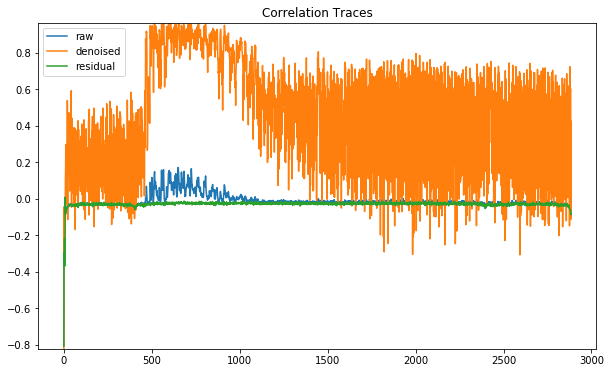

In [17]:
util_plot.correlation_traces(X, mov_denoised)


Local correlation:  range [-2.8e-02 5.2e-01]
Local correlation:  range [-1.0e+00 1.0e+00]
Local correlation:  range [-7.2e-02 5.7e-02]


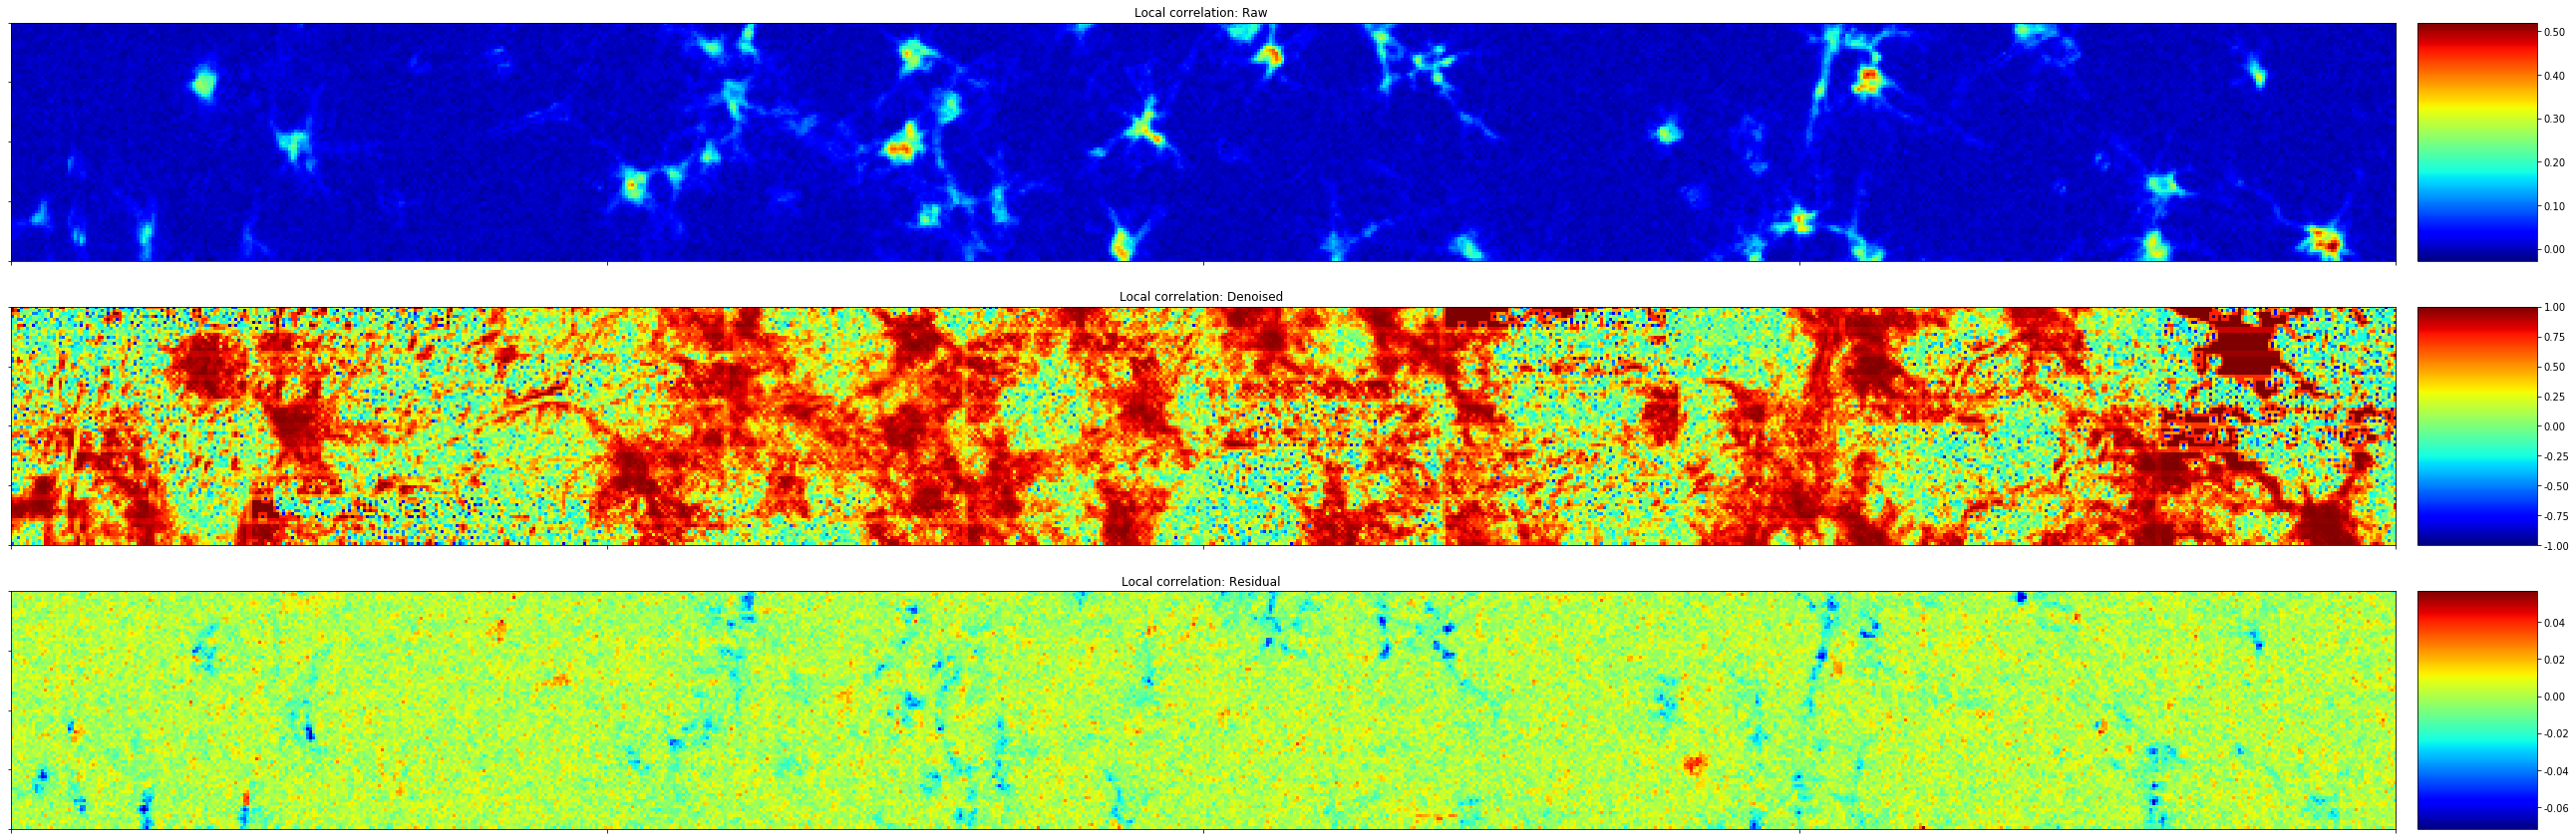

In [18]:
util_plot.comparison_plot([X, mov_denoised], plot_orientation="horizontal")

In [19]:
mov_denoised, block_rank = denoise.temporal(X,
                            U_update=False,
                           greedy=True,
                           dx=4)

Running 100 blocks in 22 cpus
	Y rank:1	run_time: 0.253151
	Y rank:1	run_time: 1.529688
	Y rank:2	run_time: 1.708734
	Y rank:2	run_time: 1.798467
	Y rank:3	run_time: 2.093864
	Y rank:2	run_time: 1.771242
	Y rank:4	run_time: 2.416627
	Y rank:3	run_time: 2.286640
	Y rank:2	run_time: 2.084801
	Y rank:2	run_time: 2.243692
	Y rank:5	run_time: 2.923584
	Y rank:2	run_time: 2.510596
	Y rank:4	run_time: 2.991550
	Y rank:2	run_time: 2.541402
	Y rank:2	run_time: 2.391914
	Y rank:3	run_time: 2.885850
	Y rank:2	run_time: 2.414664
	Y rank:3	run_time: 2.680617
	Y rank:3	run_time: 2.665500
	Y rank:2	run_time: 2.505237
	Y rank:2	run_time: 2.420182
	Y rank:2	run_time: 2.357552
	Y rank:3	run_time: 2.822929
	Y rank:4	run_time: 2.659362
	Y rank:1	run_time: 1.860199
	Y rank:3	run_time: 2.486390
	Y rank:1	run_time: 1.751113
	Y rank:2	run_time: 2.401893
	Y rank:4	run_time: 3.162198
	Y rank:3	run_time: 3.311868
	Y rank:1	run_time: 1.833699
	Y rank:4	run_time: 3.560827
	Y rank:2	run_time: 2.327546
	Y rank:1	run

../greedyPCA_SV.py:697: UserWarning: LPDAS failed to converge in MAXITER iterations.                Returning solution for last partition evaluated.
  refit=False)


	Y rank:6	run_time: 3.806565
	Y rank:2	run_time: 2.435615
	Y rank:2	run_time: 2.459667
	Y rank:2	run_time: 2.376794
	Y rank:1	run_time: 2.020454
	Y rank:3	run_time: 2.707698
	Y rank:3	run_time: 3.020455
	Y rank:4	run_time: 3.040896
	Y rank:3	run_time: 2.883432
	Y rank:3	run_time: 2.597908
	Y rank:4	run_time: 2.947463
	Y rank:5	run_time: 3.042870
	Y rank:2	run_time: 3.170390
	Y rank:3	run_time: 2.413647
	Y rank:3	run_time: 2.319413
	Y rank:3	run_time: 2.886870
	Y rank:2	run_time: 2.074806
	Y rank:4	run_time: 2.602249
	Y rank:4	run_time: 2.733902
	Y rank:4	run_time: 2.723166
	Y rank:4	run_time: 2.520298
	Y rank:2	run_time: 1.582722
	Y rank:3	run_time: 1.799861
	Y rank:4	run_time: 1.707740
Blocks(=90) run time: 19.331896
Running 81 blocks in 22 cpus
	Y rank:1	run_time: 0.245012
	Y rank:1	run_time: 0.528757
	Y rank:2	run_time: 2.164343
	Y rank:1	run_time: 2.264704
	Y rank:2	run_time: 2.082866
	Y rank:3	run_time: 2.420756
	Y rank:3	run_time: 2.060467
	Y rank:1	run_time: 2.104578
	Y rank:3	r

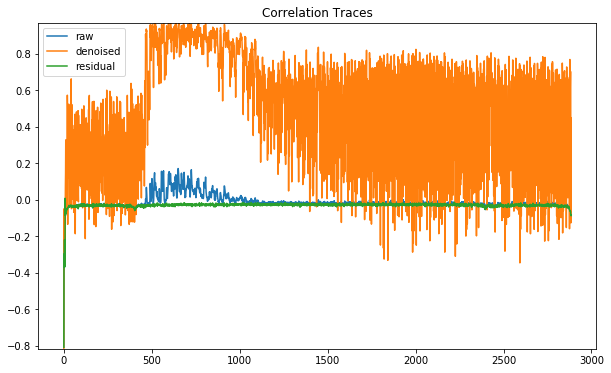

In [20]:
util_plot.correlation_traces(X, mov_denoised)

Local correlation:  range [-2.8e-02 5.2e-01]
Local correlation:  range [-1.0e+00 1.0e+00]
Local correlation:  range [-8.2e-02 4.6e-02]


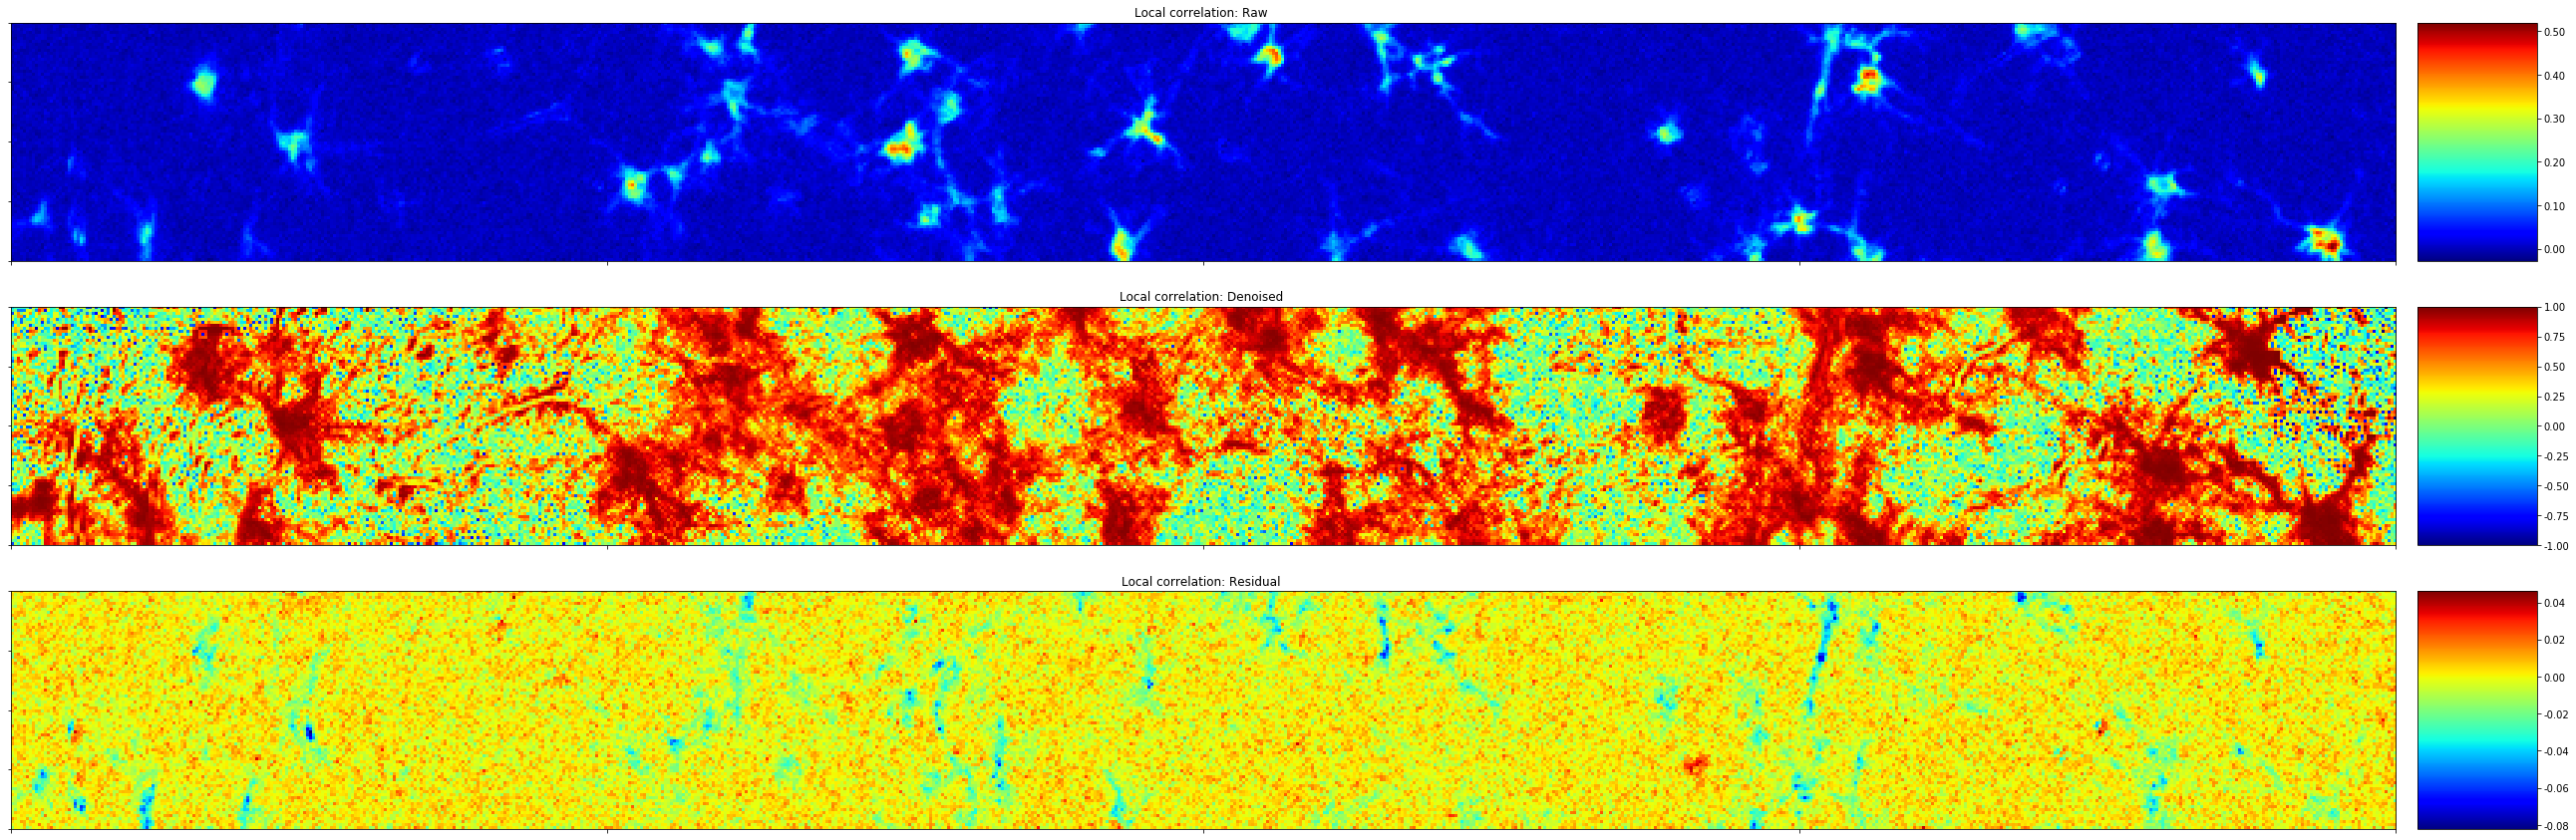

In [21]:
util_plot.comparison_plot([X, mov_denoised], plot_orientation="horizontal")